# DATA PREPROCESSING

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

In [2]:
# Reading the data into a dataframe
df = pd.read_csv('/content/Police_Department_Incident_Reports__2018_to_Present_20240521.csv')

# DATA WRANGLING

In [3]:
# previewing the data
df.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/03/13 11:41:00 PM,2023/03/13,23:41,2023,Monday,2023/03/13 11:41:00 PM,125373607041,1253736,230167874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/03/13 01:16:00 PM,2023/03/13,13:16,2023,Monday,2023/03/13 01:17:00 PM,125357107041,1253571,220343896,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
852661,2023/03/22 01:30:00 PM,2023/03/22,13:30,2023,Wednesday,2023/03/22 01:35:00 PM,125685303401,1256853,230201949,230811847.0,...,-122.406336,POINT (-122.40633623830558 37.75300402962228),54.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0
852662,2023/03/22 12:13:00 AM,2023/03/22,00:13,2023,Wednesday,2023/03/22 12:13:00 AM,125665206371,1256652,230200838,230810020.0,...,-122.440624,POINT (-122.44062361999508 37.78899525864335),102.0,NaN,NaN,NaN,NaN,NaN,6.0,4.0
852663,2023/03/21 09:19:00 PM,2023/03/21,21:19,2023,Tuesday,2023/03/21 10:16:00 PM,125664272000,1256642,230200800,230803734.0,...,-122.452665,POINT (-122.45266472219633 37.70880633652071),66.0,NaN,NaN,NaN,NaN,NaN,1.0,9.0
852664,2023/03/22 03:28:00 PM,2023/03/22,15:28,2023,Wednesday,2023/03/22 05:51:00 PM,125687306303,1256873,230202486,230812680.0,...,-122.405574,POINT (-122.40557374633903 37.790565236529574),19.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
852665,2023/03/21 05:42:00 PM,2023/03/21,17:42,2023,Tuesday,2023/03/22 09:40:00 AM,125676707021,1256767,230201450,230811015.0,...,-122.402056,POINT (-122.40205647302719 37.72127745117722),91.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852666 entries, 0 to 852665
Data columns (total 35 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     852666 non-null  object 
 1   Incident Date                                         852666 non-null  object 
 2   Incident Time                                         852666 non-null  object 
 3   Incident Year                                         852666 non-null  int64  
 4   Incident Day of Week                                  852666 non-null  object 
 5   Report Datetime                                       852666 non-null  object 
 6   Row ID                                                852666 non-null  int64  
 7   Incident ID                                           852666 non-null  int64  
 8   Incident Number                             

In [6]:
df.describe()

,Incident Year,Row ID,Incident ID,Incident Number,CAD Number,Incident Code,CNN,Supervisor District,Supervisor District 2012,Latitude,Longitude,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
count,852666.000000,8.526660e+05,8.526660e+05,8.526660e+05,6.608990e+05,852666.000000,8.057260e+05,805278.000000,805585.000000,805726.000000,805726.000000,789258.000000,8982.0,111487.0,109868.0,177381.000000,0.0,805585.000000,804837.000000
mean,2020.598235,1.006181e+11,1.006181e+06,2.075797e+08,2.085441e+08,24584.631873,2.531160e+07,5.937304,5.982992,37.769017,-122.424060,53.063461,1.0,1.0,1.0,2.322363,NaN,6.708735,4.928476
std,1.864149,2.224444e+10,2.224444e+05,1.905096e+07,2.639422e+07,25654.814977,3.114847e+06,2.835500,2.805261,0.024528,0.026381,32.604179,0.0,0.0,0.0,1.368072,NaN,3.334780,2.752590
min,2018.000000,6.186871e+10,6.186870e+05,0.000000e+00,1.000000e+00,1000.000000,2.001300e+07,1.000000,1.000000,37.707988,-122.511421,1.000000,1.0,1.0,1.0,1.000000,NaN,1.000000,1.000000
25%,2019.000000,8.137413e+10,8.137412e+05,1.905318e+08,1.917522e+08,6244.000000,2.395300e+07,3.000000,3.000000,37.754099,-122.434698,23.000000,1.0,1.0,1.0,1.000000,NaN,3.000000,3.000000
50%,2021.000000,1.005691e+11,1.005690e+06,2.101001e+08,2.104217e+08,7041.000000,2.492500e+07,6.000000,6.000000,37.775787,-122.417783,50.000000,1.0,1.0,1.0,3.000000,NaN,7.000000,5.000000
75%,2022.000000,1.198788e+11,1.198788e+06,2.208081e+08,2.227117e+08,51040.000000,2.646900e+07,9.000000,8.000000,37.785744,-122.407337,86.000000,1.0,1.0,1.0,3.000000,NaN,10.000000,7.000000
max,2024.000000,1.391788e+11,1.391788e+06,9.901103e+08,1.000000e+09,75030.000000,5.438300e+07,11.000000,11.000000,37.829991,-122.363739,117.000000,1.0,1.0,1.0,5.000000,NaN,11.000000,10.000000


In [7]:
df.shape

(852666, 35)

In [8]:
df.isnull().sum()

Incident Datetime                                            0
Incident Date                                                0
Incident Time                                                0
Incident Year                                                0
Incident Day of Week                                         0
Report Datetime                                              0
Row ID                                                       0
Incident ID                                                  0
Incident Number                                              0
CAD Number                                              191767
Report Type Code                                             0
Report Type Description                                      0
Filed Online                                            682167
Incident Code                                                0
Incident Category                                          799
Incident Subcategory                                   

In [9]:
df.nunique()

Incident Datetime                                       403969
Incident Date                                             2331
Incident Time                                             1440
Incident Year                                                7
Incident Day of Week                                         7
Report Datetime                                         607939
Row ID                                                  852666
Incident ID                                             713104
Incident Number                                         615403
CAD Number                                              487617
Report Type Code                                             4
Report Type Description                                      6
Filed Online                                                 1
Incident Code                                              848
Incident Category                                           49
Incident Subcategory                                   

In [10]:
df['Report Type Code'].value_counts()

Report Type Code
II    669063
IS     87882
VI     57325
VS     38396
Name: count, dtype: int64

In [11]:
df['HSOC Zones as of 2018-06-05'].value_counts()

HSOC Zones as of 2018-06-05
1.0    81012
3.0    69068
5.0    20697
4.0     3517
2.0     3087
Name: count, dtype: int64

In [12]:
df['Report Type Description'].value_counts()

Report Type Description
Initial                516963
Coplogic Initial       152100
Initial Supplement      69483
Vehicle Initial         57325
Vehicle Supplement      38396
Coplogic Supplement     18399
Name: count, dtype: int64

In [13]:
df['Incident Day of Week'].value_counts()

Incident Day of Week
Friday       130715
Wednesday    127336
Thursday     122213
Monday       120403
Tuesday      120243
Saturday     119845
Sunday       111911
Name: count, dtype: int64

According to the above data Friday is the day with the highest count for crimes and Sunday had the least.

In [14]:
df.CNN.value_counts()

CNN
34016000.0    4767
23914000.0    3989
24929000.0    3887
24904000.0    3832
33719000.0    3394
              ... 
27966000.0       1
51370000.0       1
54065000.0       1
54162000.0       1
51364000.0       1
Name: count, Length: 6718, dtype: int64

In [15]:
df['Incident Category'].value_counts()

Incident Category
Larceny Theft                                   256495
Other Miscellaneous                              57905
Malicious Mischief                               57609
Assault                                          52312
Non-Criminal                                     49835
Burglary                                         47276
Motor Vehicle Theft                              46231
Recovered Vehicle                                34491
Fraud                                            27755
Lost Property                                    24894
Warrant                                          24687
Drug Offense                                     21597
Robbery                                          19154
Missing Person                                   18401
Suspicious Occ                                   17520
Disorderly Conduct                               14646
Offences Against The Family And Children         11222
Miscellaneous Investigation                    

In [16]:
df['Resolution'].value_counts()

Resolution
Open or Active          685559
Cite or Arrest Adult    160463
Unfounded                 4300
Exceptional Adult         2344
Name: count, dtype: int64

In [17]:
df['Point'].value_counts()[:5]

Point
POINT (-122.40733704162238 37.784560141211806)    4664
POINT (-122.40363551943442 37.7751608100771)      3772
POINT (-122.41259527758581 37.7839325760642)      3663
POINT (-122.40803623744476 37.78640961281089)     3614
POINT (-122.47603947349434 37.72694991292525)     3249
Name: count, dtype: int64

It shows that the point (-122.40733704162238 37.784560141211806) was the highest point for reporting of crimes.

In [18]:
# choosing columns to drop.
drop_columns = ["Incident Date","Incident Time","Incident Time","Report Datetime","Row ID",
                "Latitude","Longitude",'Invest In Neighborhoods (IIN) Areas', 'CAD Number',
                'ESNCAG - Boundary File', 'Central Market/Tenderloin Boundary Polygon - Updated',
                'Supervisor District 2012','Incident Number']

In [19]:
# dropping unnecessary columns
df = df.drop(columns = drop_columns)

In [20]:
# previewing the data after dropping columns
df.head()

,Incident Datetime,Incident Year,Incident Day of Week,Incident ID,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,...,CNN,Police District,Analysis Neighborhood,Supervisor District,Point,Neighborhoods,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
0,2023/03/13 11:41:00 PM,2023,Monday,1253736,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,...,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/01 05:02:00 AM,2023,Wednesday,1253795,II,Coplogic Initial,True,6374,Larceny Theft,Larceny Theft - Other,...,NaN,Mission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/03/13 01:16:00 PM,2023,Monday,1253571,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,...,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/03/13 10:59:00 AM,2023,Monday,1253551,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,...,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/14 06:44:00 PM,2023,Tuesday,1254024,VS,Vehicle Supplement,NaN,7041,Recovered Vehicle,Recovered Vehicle,...,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Checking the information the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852666 entries, 0 to 852665
Data columns (total 23 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Incident Datetime                             852666 non-null  object 
 1   Incident Year                                 852666 non-null  int64  
 2   Incident Day of Week                          852666 non-null  object 
 3   Incident ID                                   852666 non-null  int64  
 4   Report Type Code                              852666 non-null  object 
 5   Report Type Description                       852666 non-null  object 
 6   Filed Online                                  170499 non-null  object 
 7   Incident Code                                 852666 non-null  int64  
 8   Incident Category                             851867 non-null  object 
 9   Incident Subcategory                          85

In [22]:
# chwcking the null values in the remaining columns
df.isnull().sum()

Incident Datetime                                    0
Incident Year                                        0
Incident Day of Week                                 0
Incident ID                                          0
Report Type Code                                     0
Report Type Description                              0
Filed Online                                    682167
Incident Code                                        0
Incident Category                                  799
Incident Subcategory                               799
Incident Description                                 0
Resolution                                           0
Intersection                                     46940
CNN                                              46940
Police District                                      0
Analysis Neighborhood                            47103
Supervisor District                              47388
Point                                            46940
Neighborho

In [23]:
# checking the count of crimes filed online
df['Filed Online'].value_counts()

Filed Online
True    170499
Name: count, dtype: int64

In [24]:
# filling the empty values with false meaning the rimes were filed physically.
df['Filed Online'] = df['Filed Online'].fillna('False')

In [25]:
# filling the empty rows within the category column since they were not classified.
df['Incident Category'] = df['Incident Category'].fillna('Not Specified')

In [26]:
# filling the empty rows within the subcategory column since they were not classified.
df['Incident Subcategory'] = df['Incident Subcategory'].fillna('Not Specified')

In [27]:
df['Analysis Neighborhood'].value_counts()

Analysis Neighborhood
Mission                           85848
Tenderloin                        84462
South of Market                   66077
Financial District/South Beach    63044
Bayview Hunters Point             53784
North Beach                       26893
Western Addition                  26533
Sunset/Parkside                   24398
Nob Hill                          23233
Castro/Upper Market               23009
Marina                            22454
Hayes Valley                      22100
Russian Hill                      19425
Outer Richmond                    18417
West of Twin Peaks                16578
Bernal Heights                    15530
Chinatown                         15008
Pacific Heights                   14461
Mission Bay                       14281
Excelsior                         14003
Potrero Hill                      13579
Haight Ashbury                    13131
Outer Mission                     11996
Inner Richmond                    10837
Lakeshore         

In [28]:
# filling the rows in the neighborhood column with not given since it wasn't during reporting.
df['Analysis Neighborhood'] = df['Analysis Neighborhood'].fillna('Not given')

In [29]:
# filling the empty neighborhood columns with 0
df['Neighborhoods'].value_counts()
df['Neighborhoods']=df['Neighborhoods'].fillna(0)

In [30]:
# filling the empty rows in the column with the standard which is 1.
df['Civic Center Harm Reduction Project Boundary'].value_counts()
df['Civic Center Harm Reduction Project Boundary'] = df['Civic Center Harm Reduction Project Boundary'].fillna(1)

In [31]:
df.isnull().sum()

Incident Datetime                                    0
Incident Year                                        0
Incident Day of Week                                 0
Incident ID                                          0
Report Type Code                                     0
Report Type Description                              0
Filed Online                                         0
Incident Code                                        0
Incident Category                                    0
Incident Subcategory                                 0
Incident Description                                 0
Resolution                                           0
Intersection                                     46940
CNN                                              46940
Police District                                      0
Analysis Neighborhood                                0
Supervisor District                              47388
Point                                            46940
Neighborho

In [32]:
# selecting the rows to drop empty rows
drop_rows_columns = ['Point','Current Police Districts','Police District','Current Supervisor Districts',
                     'Supervisor District','HSOC Zones as of 2018-06-05','CNN','Intersection' ]

In [33]:
# creating a for loop to loop though the dataframe to drop the empty rows in the specified columns.
for column in drop_rows_columns:
  df.dropna(subset = column, inplace = True)
  df.head()

In [34]:
df.isnull().sum()

Incident Datetime                               0
Incident Year                                   0
Incident Day of Week                            0
Incident ID                                     0
Report Type Code                                0
Report Type Description                         0
Filed Online                                    0
Incident Code                                   0
Incident Category                               0
Incident Subcategory                            0
Incident Description                            0
Resolution                                      0
Intersection                                    0
CNN                                             0
Police District                                 0
Analysis Neighborhood                           0
Supervisor District                             0
Point                                           0
Neighborhoods                                   0
Civic Center Harm Reduction Project Boundary    0


In [35]:
df.head()

,Incident Datetime,Incident Year,Incident Day of Week,Incident ID,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,...,CNN,Police District,Analysis Neighborhood,Supervisor District,Point,Neighborhoods,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
220,2021/07/12 06:18:00 PM,2021,Monday,1049843,II,Initial,False,26080,Other Miscellaneous,Other,...,21343000.0,Mission,Mission,9.0,POINT (-122.41917060471224 37.74817939136343),53.0,1.0,3.0,2.0,3.0
221,2021/07/07 08:18:00 AM,2021,Wednesday,1047858,II,Initial,False,4134,Assault,Simple Assault,...,24094000.0,Mission,Mission,9.0,POINT (-122.41859394629981 37.753836586731786),53.0,1.0,3.0,2.0,3.0
304,2021/07/12 12:20:00 PM,2021,Monday,1049809,II,Initial,False,19057,Disorderly Conduct,Intimidation,...,24924000.0,Tenderloin,Tenderloin,5.0,POINT (-122.41076482950653 37.78321431177312),20.0,1.0,1.0,10.0,5.0
309,2019/06/11 04:30:00 PM,2019,Tuesday,1037700,II,Initial,False,2004,Rape,Rape,...,24275000.0,Southern,South of Market,6.0,POINT (-122.40884575063417 37.775953228502786),32.0,1.0,1.0,10.0,1.0
342,2022/09/25 05:00:00 PM,2022,Sunday,1197413,II,Initial,False,74000,Missing Person,Missing Adult,...,24080000.0,Mission,Mission,9.0,POINT (-122.41562619847495 37.75723240847821),53.0,1.0,3.0,2.0,3.0


# EXPLORATORY DATA ANALYSIS


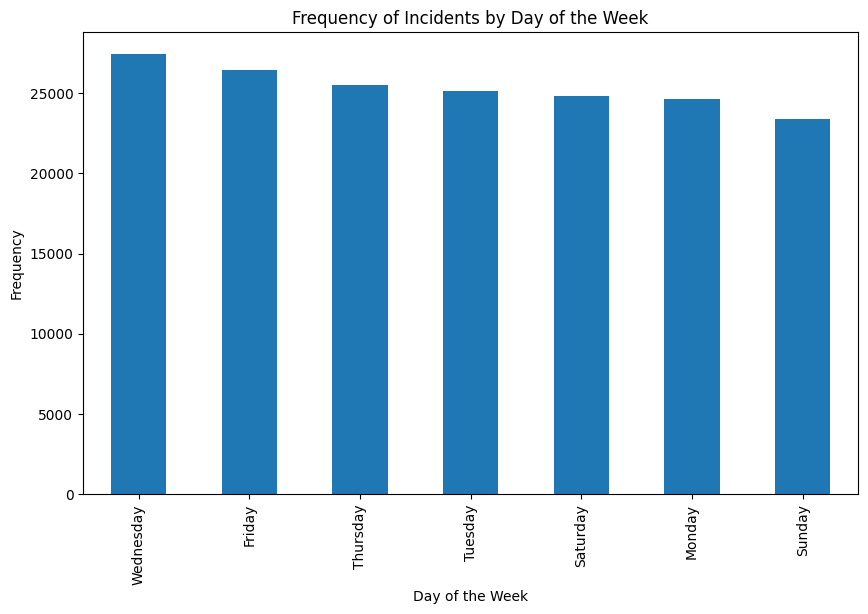

In [36]:
plt.figure(figsize=(10, 6))
df['Incident Day of Week'].value_counts().plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of Incidents by Day of the Week')
plt.show()

According to the above chart, it shows the day with the highest number of crimes being Wednesday and Sunday being the lowest In San Francisco.

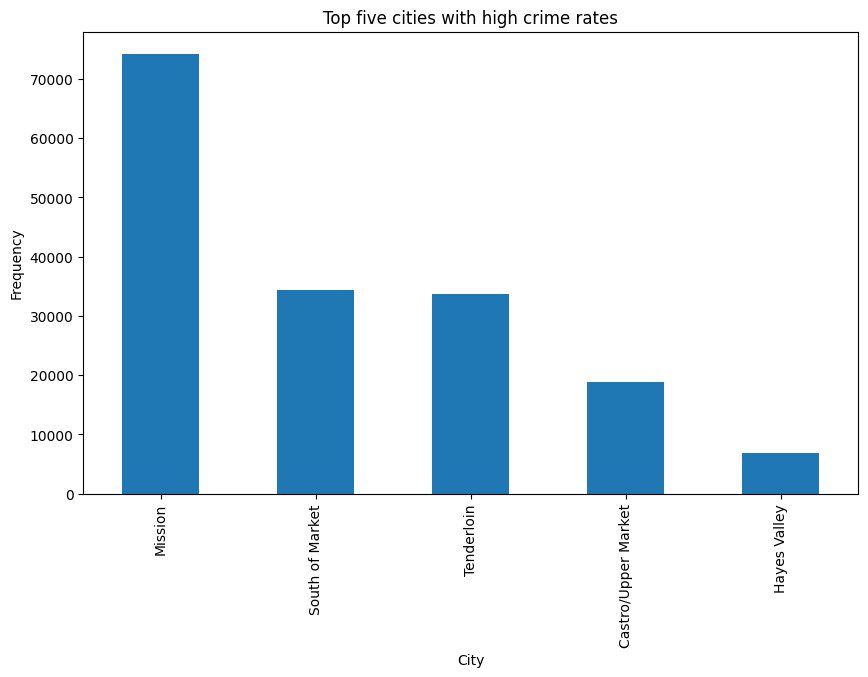

In [37]:
plt.figure(figsize=(10, 6))
df['Analysis Neighborhood'].value_counts()[:5].plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Top five cities with high crime rates')
plt.show()

In [38]:
# Group the data by 'occurrences' in each city of each incident category
city_incident_counts = df.groupby('Incident Category')['Analysis Neighborhood'].value_counts().unstack()

# Get the top five incident categories for each city
top_five_by_city = city_incident_counts.apply(lambda x: x.sort_values(ascending=False).head(5))

# Display the top five incident categories by number for each city
print(top_five_by_city)



Analysis Neighborhood  Bernal Heights  Castro/Upper Market  \
Incident Category                                            
Assault                         172.0               1525.0   
Burglary                          NaN               1280.0   
Drug Offense                      NaN                  NaN   
Larceny Theft                   393.0               5376.0   
Malicious Mischief              170.0               1483.0   
Missing Person                    NaN                  NaN   
Motor Vehicle Theft             165.0                  NaN   
Non-Criminal                      NaN                  NaN   
Other Miscellaneous             211.0               1453.0   
Warrant                           NaN                  NaN   

Analysis Neighborhood  Financial District/South Beach  Haight Ashbury  \
Incident Category                                                       
Assault                                         195.0            41.0   
Burglary                            

In [39]:
df.dtypes

Incident Datetime                                object
Incident Year                                     int64
Incident Day of Week                             object
Incident ID                                       int64
Report Type Code                                 object
Report Type Description                          object
Filed Online                                     object
Incident Code                                     int64
Incident Category                                object
Incident Subcategory                             object
Incident Description                             object
Resolution                                       object
Intersection                                     object
CNN                                             float64
Police District                                  object
Analysis Neighborhood                            object
Supervisor District                             float64
Point                                           

220    2021/07/12 06:18:00 PM
221    2021/07/07 08:18:00 AM
304    2021/07/12 12:20:00 PM
309    2019/06/11 04:30:00 PM
342    2022/09/25 05:00:00 PM
Name: Incident Datetime, dtype: object


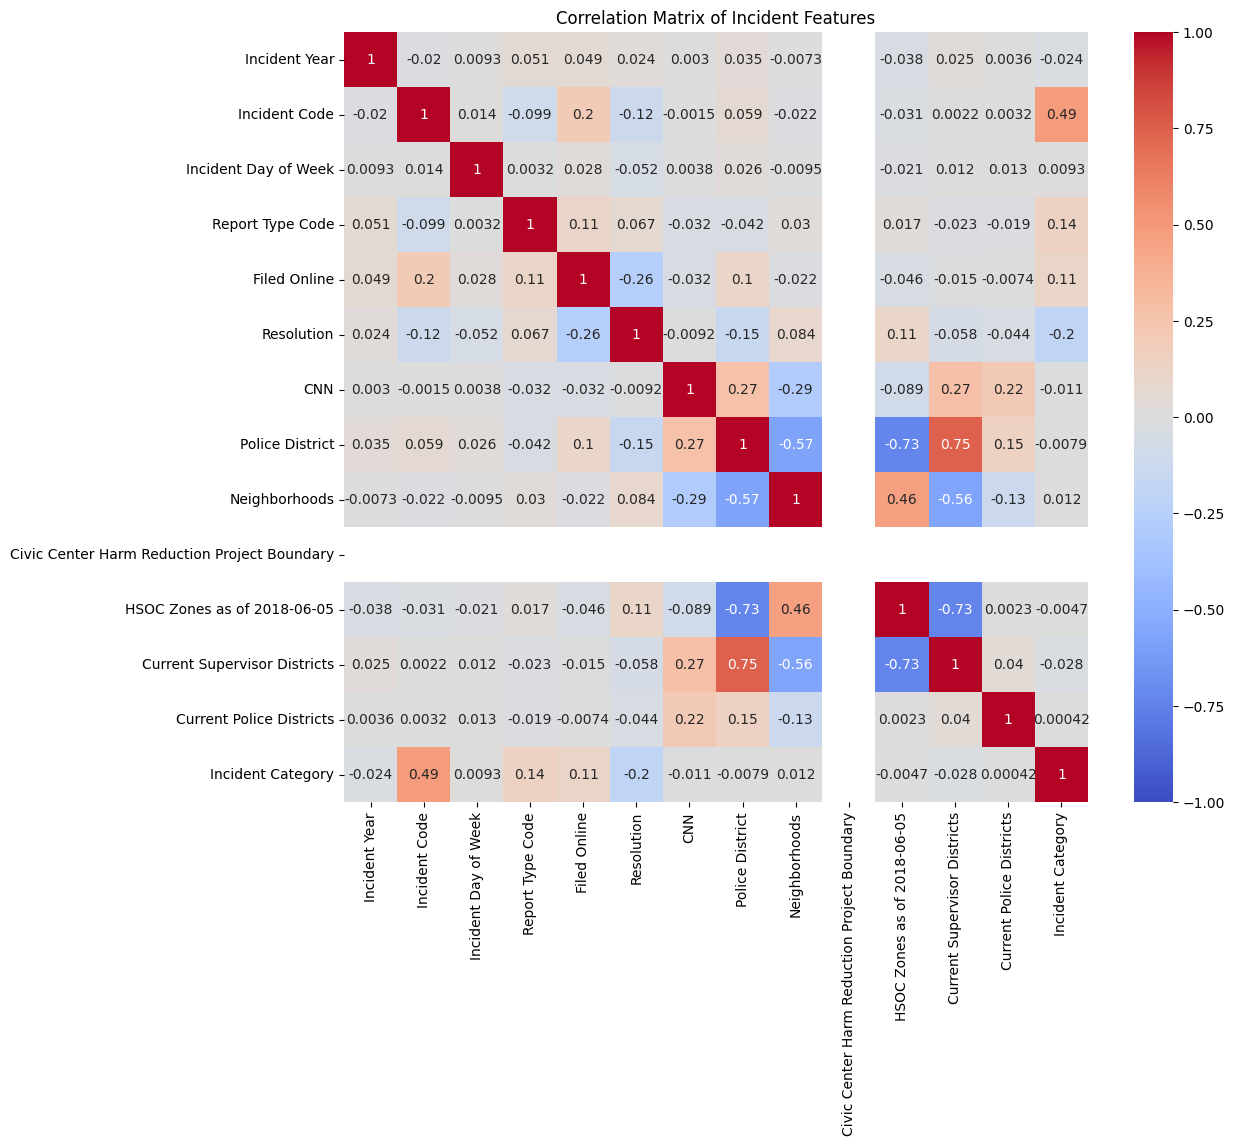

In [40]:
# Inspect the first few rows to determine the datetime format
print(df['Incident Datetime'].head())

# Conerting the date to date time.
datetime_format = "%Y/%m/%d %I:%M:%S %p"
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'], format=datetime_format)

# Encode categorical variables as numerical
categorical_cols = [
    'Incident Day of Week', 'Report Type Code', 'Report Type Description',
    'Filed Online', 'Incident Category', 'Incident Subcategory',
    'Incident Description', 'Resolution', 'Intersection',
    'Police District', 'Analysis Neighborhood'
]

for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Select relevant features for correlation analysis
features = [
    'Incident Year', 'Incident Code', 'Incident Day of Week',
    'Report Type Code', 'Filed Online', 'Resolution',
    'CNN', 'Police District','Neighborhoods',
    'Civic Center Harm Reduction Project Boundary',
    'HSOC Zones as of 2018-06-05', 'Current Supervisor Districts',
    'Current Police Districts', 'Incident Category'
]

# Ensure there are no missing values in the selected features
correlation_df = df[features].dropna()

# Compute the correlation matrix
corr_matrix = correlation_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Incident Features')
plt.show()

This heatmap shows the correlation between different features in our dataset. The features with the colour close to red  have a stronger positive correlation, those with white show no correlation at all while those cells with blue show astrong negative correlation.


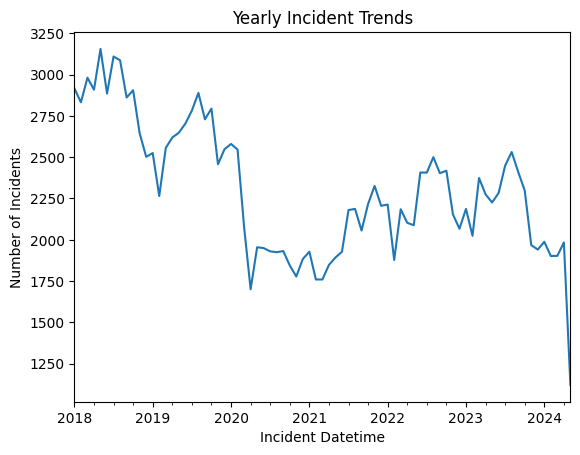

In [41]:
# Time Series Analysis

# Conerting the date to date time.
datetime_format = "%Y/%m/%d %I:%M:%S %p"

# Convert the 'Incident Datetime' column to datetime with specified format
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'], format=datetime_format)
df.set_index('Incident Datetime').resample('M').size().plot()
plt.title('Yearly Incident Trends')
plt.ylabel('Number of Incidents')
plt.show()


The plot above shows a steep decrease in crimes leading to the year 2020 owing to the covid 19 when the curfew was enforced. After 2020, the crime rate increased steadily with some years being low but 2018 still remains the year with the highest crime rate.

<Figure size 1200x600 with 0 Axes>

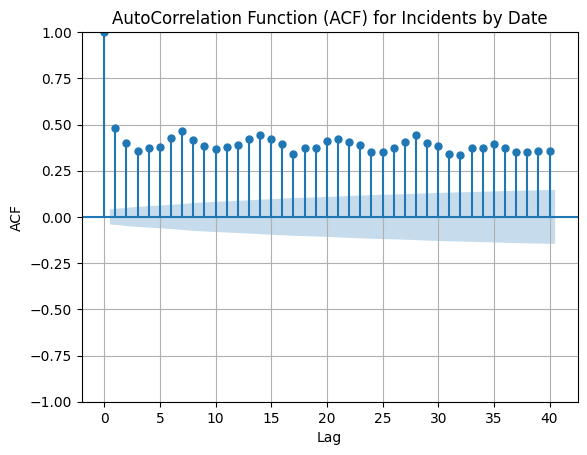

<Figure size 1200x600 with 0 Axes>

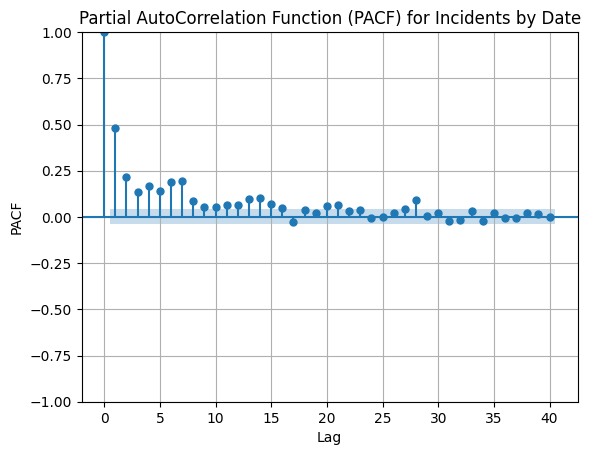

In [42]:
# Convert 'Incident Datetime' to datetime format
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])

# Extract year, month, and day from 'Incident Datetime'
df['Year'] = df['Incident Datetime'].dt.year
df['Month'] = df['Incident Datetime'].dt.month
df['Day'] = df['Incident Datetime'].dt.day

# Count the number of incidents for each combination of year, month, and day using Incident ID
incidents_by_date = df.groupby(['Year', 'Month', 'Day'])['Incident ID'].size()

# Plot ACF and PACF for the count of incidents
plt.figure(figsize=(12, 6))
plot_acf(incidents_by_date, lags=40, alpha=0.05)
plt.title('AutoCorrelation Function (ACF) for Incidents by Date')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(incidents_by_date, lags=40, alpha=0.05)
plt.title('Partial AutoCorrelation Function (PACF) for Incidents by Date')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid()
plt.show()

# MODEL BUILDING AND EVALUATION.


### Baseline model


In [43]:
# Creating a baseline to compare the maes of the models.
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])

# Extract year, month, and day from 'Incident Datetime'
df['Year'] = df['Incident Datetime'].dt.year
df['Month'] = df['Incident Datetime'].dt.month
df['Day'] = df['Incident Datetime'].dt.day

# Count the number of incidents for each combination of year, month, and day
incidents_by_date = df.groupby(['Year', 'Month', 'Day'])['Incident ID'].size().reset_index(name='Incident Count')

# Combine Year, Month, Day into a single datetime column
incidents_by_date['Date'] = pd.to_datetime(incidents_by_date[['Year', 'Month', 'Day']])

# Set the datetime column as the index
incidents_by_date.set_index('Date', inplace=True)

# Drop the Year, Month, Day columns as they are no longer needed
incidents_by_date.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

print(incidents_by_date.head())

# Split the data
train_size = int(0.8 * len(incidents_by_date))
train_data, test_data = incidents_by_date[:train_size], incidents_by_date[train_size:]

            Incident Count
Date                      
2018-01-01             100
2018-01-02              90
2018-01-03              74
2018-01-04             121
2018-01-05             110


In [44]:
# Calculating the mae for the baseline
train_mean = train_data.mean()
pred_baseline = [train_mean] * len(train_data)
mae_baseline = mean_absolute_error(train_data, pred_baseline)

print("Mean P2 Reading:", round(train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: Incident Count    77.37
dtype: float64
Baseline MAE: 15.27


In [45]:
# Adding parameters to the arima model to try and improve the performance.
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])

# Extract year, month, and day from 'Incident Datetime'
df['Year'] = df['Incident Datetime'].dt.year
df['Month'] = df['Incident Datetime'].dt.month
df['Day'] = df['Incident Datetime'].dt.day

# Count the number of incidents for each combination of year, month, and day
incidents_by_date = df.groupby(['Year', 'Month', 'Day'])['Incident ID'].size().reset_index(name='Incident Count')

# Combine Year, Month, Day into a single datetime column
incidents_by_date['Date'] = pd.to_datetime(incidents_by_date[['Year', 'Month', 'Day']])

# Set the datetime column as the index
incidents_by_date.set_index('Date', inplace=True)

# Drop the Year, Month, Day columns as they are no longer needed
incidents_by_date.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

print(incidents_by_date.head())

# Split the data
train_size = int(0.8 * len(incidents_by_date))
train_data, test_data = incidents_by_date[:train_size], incidents_by_date[train_size:]
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# Define the p, d, q ranges
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best results
best_rmse = float("inf")
best_order = None

# Grid search
for order in pdq:
    try:
        model = ARIMA(train_scaled, order=order).fit()
        forecast = model.forecast(steps=len(test_scaled))
        rmse = mean_squared_error(test_scaled, forecast, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_order = order
    except Exception as e:
        continue

print(f"Best ARIMA order: {best_order} with RMSE: {best_rmse}")

# Fit the final model with the best parameters
start_time = time.time()
model = ARIMA(train_scaled, order=best_order).fit()
elapsed_time = round(time.time() - start_time, 2)
print(f"Trained ARIMA {best_order} in {elapsed_time} seconds.")

# Forecast and evaluate
forecast = model.forecast(steps=len(test_scaled))
final_rmse = mean_squared_error(test_scaled, forecast, squared=False)
print('Final RMSE:', final_rmse)

            Incident Count
Date                      
2018-01-01             100
2018-01-02              90
2018-01-03              74
2018-01-04             121
2018-01-05             110


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: Use

Best ARIMA order: (0, 1, 1) with RMSE: 0.07334207970260251
Trained ARIMA (0, 1, 1) in 0.33 seconds.
Final RMSE: 0.07334207970260251


In [46]:
# Perform Augmented Dickey-Fuller test
result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, data is non-stationary, apply differencing
if result[1] > 0.05:
    train_data_diff = train_data.diff().dropna()
    test_data_diff = test_data.diff().dropna()
else:
    train_data_diff = train_data
    test_data_diff = test_data

ADF Statistic: -2.480118805003451
p-value: 0.12038687272730125


In [47]:
mae = mean_absolute_error(test_data, forecast)
mape = mean_absolute_percentage_error(test_data, forecast)
print(mae, mape)

70.85161628522984 0.9973418470381499


The above shows a p_value of more than 0.05 which indicates the data is non-stationary, below I applied differencing to make the data stationary.

### ARIMA MODEL WITH DIFFERENCING

In [48]:
#Perform ADF Test
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])

# Extract year, month, and day from 'Incident Datetime'
df['Year'] = df['Incident Datetime'].dt.year
df['Month'] = df['Incident Datetime'].dt.month
df['Day'] = df['Incident Datetime'].dt.day

# Count the number of incidents for each combination of year, month, and day
incidents_by_date = df.groupby(['Year', 'Month', 'Day'])['Incident ID'].size().reset_index(name='Incident Count')

# Combine Year, Month, Day into a single datetime column
incidents_by_date['Date'] = pd.to_datetime(incidents_by_date[['Year', 'Month', 'Day']])

# Set the datetime column as the index
incidents_by_date.set_index('Date', inplace=True)

# Drop the Year, Month, Day columns as they are no longer needed
incidents_by_date.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

print(incidents_by_date.head())

# Split the data
train_size = int(0.8 * len(incidents_by_date))
train_data, test_data = incidents_by_date[:train_size], incidents_by_date[train_size:]
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1]

# Apply differencing if data is non-stationary
p_value = check_stationarity(train_data['Incident Count'])
diff_order = 0

if p_value > 0.05:
    diff_order = 1
    train_data_diff = train_data.diff().dropna()
    test_data_diff = test_data.diff().dropna()
    p_value = check_stationarity(train_data_diff['Incident Count'])

    if p_value > 0.05:
        diff_order = 2
        train_data_diff = train_data_diff.diff().dropna()
        test_data_diff = test_data_diff.diff().dropna()
        p_value = check_stationarity(train_data_diff['Incident Count'])
else:
    train_data_diff = train_data
    test_data_diff = test_data

print(f"Data differenced {diff_order} times to achieve stationarity with p-value: {p_value}")

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data_diff.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data_diff.values.reshape(-1, 1))

# Define the p, d, q ranges
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best results
best_rmse = float("inf")
best_order = None

# Grid search
for order in pdq:
    try:
        model = ARIMA(train_scaled, order=order).fit()
        forecast = model.forecast(steps=len(test_scaled))
        rmse = mean_squared_error(test_scaled, forecast, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_order = order
    except Exception as e:
        continue

print(f"Best ARIMA order: {best_order} with RMSE: {best_rmse}")

# Fit the final model with the best parameters
start_time = time.time()
model = ARIMA(train_scaled, order=best_order).fit()
elapsed_time = round(time.time() - start_time, 2)
print(f"Trained ARIMA {best_order} in {elapsed_time} seconds.")

# Forecast and evaluate
forecast = model.forecast(steps=len(test_scaled))
final_rmse = mean_squared_error(test_scaled, forecast, squared=False)
print('Final RMSE:', final_rmse)

# Inverse transform the forecasts
forecast_scaled = forecast.reshape(-1, 1)
forecast = scaler.inverse_transform(forecast_scaled)

# Ensure test data is also reshaped correctly
test_data_original = test_scaled.reshape(-1, 1)
test_data_original = scaler.inverse_transform(test_data_original)

# Function to inverse differencing
def inverse_difference(original, diff_values, diff_order):
    if diff_order == 0:
        return diff_values
    elif diff_order == 1:
        return original.iloc[-len(diff_values):].values.flatten() + diff_values
    else:
        first_diff = original.diff().dropna().iloc[-len(diff_values):].values.flatten()
        return original.iloc[-len(diff_values)-1:-1].values.flatten() + first_diff + diff_values

# Apply inverse differencing
forecast_final = inverse_difference(train_data, forecast.flatten(), diff_order)
test_final = inverse_difference(train_data, test_data_original.flatten(), diff_order)

# Ensure the lengths are consistent
min_len = min(len(forecast_final), len(test_final))
forecast_final = forecast_final[:min_len]
test_final = test_final[:min_len]

# Evaluate the final forecasts
final_rmse = mean_squared_error(test_final, forecast_final, squared=False)
print('Final RMSE after inverse differencing:', final_rmse)

# Calculate MAE and MAPE
mae = mean_absolute_error(test_final, forecast_final)
mape = mean_absolute_percentage_error(test_final, forecast_final)
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

            Incident Count
Date                      
2018-01-01             100
2018-01-02              90
2018-01-03              74
2018-01-04             121
2018-01-05             110
ADF Statistic: -2.480118805003451
p-value: 0.12038687272730125
ADF Statistic: -14.889018541543024
p-value: 1.5675674326673593e-27
Data differenced 1 times to achieve stationarity with p-value: 1.5675674326673593e-27


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max

Best ARIMA order: (2, 0, 2) with RMSE: 0.06711042341046204
Trained ARIMA (2, 0, 2) in 7.05 seconds.
Final RMSE: 0.06711042341046204
Final RMSE after inverse differencing: 19.797574906086304
MAE: 15.377183804629661
MAPE: 0.26631037983054895


After applying differencing, the mean absolute error decreased significantly, however, it is still hiher than the base line model. Therefore I explored the Auto-Arima model to try and improve the metrics.

### AUTO ARIMA MODEL

            Incident Count
Date                      
2018-01-01             100
2018-01-02              90
2018-01-03              74
2018-01-04             121
2018-01-05             110
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=-4960.375, Time=8.66 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-3958.102, Time=0.21 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-4347.716, Time=3.80 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-4945.232, Time=5.80 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-3960.099, Time=0.12 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=-4961.610, Time=10.66 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=-4955.074, Time=5.78 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=-4962.071, Time=20.08 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=-4960.287, Time=19.38 sec
 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=-4944.000, Time=23.72 sec
 ARIMA(2,1,1)(0,0,2)[7] intercept   : AIC=-4954.180, Time=23.73 sec
 ARIMA(3,1,2)(0,0,2)[7] in

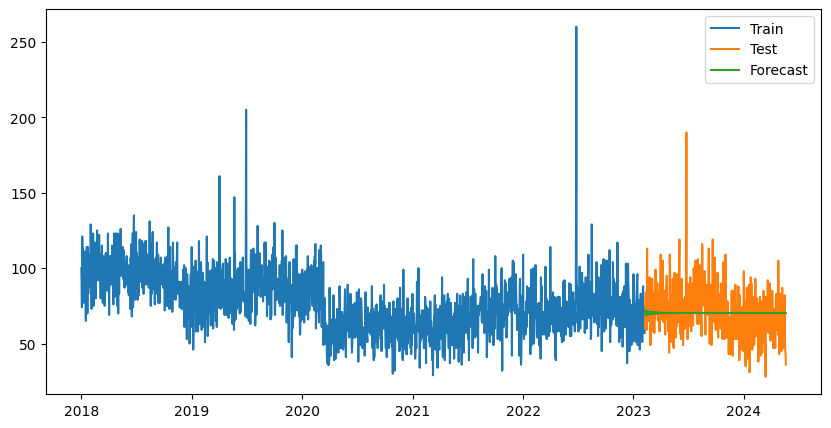

In [49]:
# Scale the data
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])

# Extract year, month, and day from 'Incident Datetime'
df['Year'] = df['Incident Datetime'].dt.year
df['Month'] = df['Incident Datetime'].dt.month
df['Day'] = df['Incident Datetime'].dt.day

# Count the number of incidents for each combination of year, month, and day
incidents_by_date = df.groupby(['Year', 'Month', 'Day'])['Incident ID'].size().reset_index(name='Incident Count')

# Combine Year, Month, Day into a single datetime column
incidents_by_date['Date'] = pd.to_datetime(incidents_by_date[['Year', 'Month', 'Day']])

# Set the datetime column as the index
incidents_by_date.set_index('Date', inplace=True)

# Drop the Year, Month, Day columns as they are no longer needed
incidents_by_date.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

print(incidents_by_date.head())

# Split the data
train_size = int(0.8 * len(incidents_by_date))
train_data, test_data = incidents_by_date[:train_size], incidents_by_date[train_size:]

# scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# Fit auto_arima model on scaled data
start_time = time.time()
model = auto_arima(train_scaled, seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
elapsed_time = time.time() - start_time

# Forecast
forecast_scaled = model.predict(n_periods=len(test_scaled))

# Inverse transform the forecasts
forecast_scaled = forecast_scaled.reshape(-1, 1)
forecast = scaler.inverse_transform(forecast_scaled)

# Ensure test data is also reshaped correctly for inverse transformation
test_data_original = test_scaled.reshape(-1, 1)
test_data_original = scaler.inverse_transform(test_data_original)

# Evaluate using actual test data
rmse = mean_squared_error(test_data.values, forecast, squared=False)
mae = mean_absolute_error(test_data.values, forecast)
mape = mean_absolute_percentage_error(test_data.values, forecast)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'Time taken: {elapsed_time} seconds')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_data.index, forecast, label='Forecast')
plt.legend()

The above model shows that it isnt performing that well, addressing non stationarity wuth differencing might help to improve the results.

### AUTO ARIMA MODEL WITH DIFFERENCING

            Incident Count
Date                      
2018-01-01             100
2018-01-02              90
2018-01-03              74
2018-01-04             121
2018-01-05             110
ADF Statistic: -2.480118805003451
p-value: 0.12038687272730125
ADF Statistic: -14.889018541543024
p-value: 1.5675674326673593e-27
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=17.73 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=-4869.324, Time=0.31 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=-5104.005, Time=5.68 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=-5856.451, Time=7.53 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3126.504, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=-5852.297, Time=1.76 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=7.88 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=-5856.411, Time=10.22 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=inf, Time=6.00 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=inf, Time=

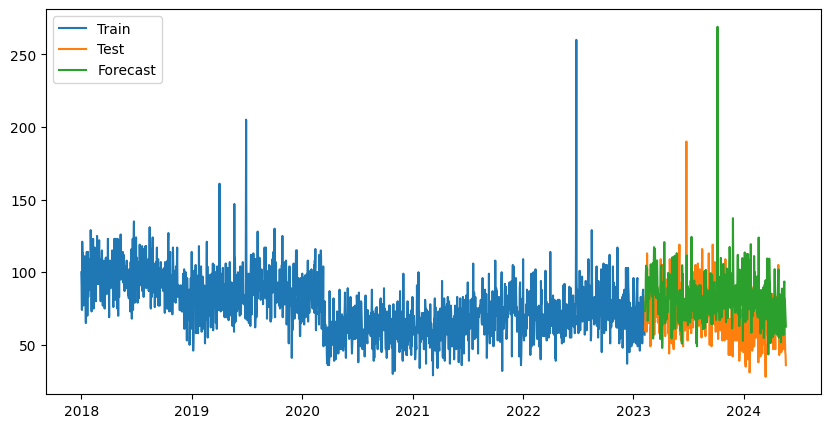

In [50]:
# Assume df is your DataFrame and it has been loaded before this code
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])

# Extract year, month, and day from 'Incident Datetime'
df['Year'] = df['Incident Datetime'].dt.year
df['Month'] = df['Incident Datetime'].dt.month
df['Day'] = df['Incident Datetime'].dt.day

# Count the number of incidents for each combination of year, month, and day
incidents_by_date = df.groupby(['Year', 'Month', 'Day'])['Incident ID'].size().reset_index(name='Incident Count')

# Combine Year, Month, Day into a single datetime column
incidents_by_date['Date'] = pd.to_datetime(incidents_by_date[['Year', 'Month', 'Day']])

# Set the datetime column as the index
incidents_by_date.set_index('Date', inplace=True)

# Drop the Year, Month, Day columns as they are no longer needed
incidents_by_date.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

print(incidents_by_date.head())

# Split the data
train_size = int(0.8 * len(incidents_by_date))
train_data, test_data = incidents_by_date[:train_size], incidents_by_date[train_size:]

# Check stationarity and apply differencing if needed
def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1] <= 0.05

diff_order = 0
train_data_diff = train_data.copy()

if not check_stationarity(train_data):
    diff_order = 1
    train_data_diff = train_data.diff().dropna()

    if not check_stationarity(train_data_diff):
        diff_order = 2
        train_data_diff = train_data_diff.diff().dropna()

# Scale the differenced data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data_diff.values.reshape(-1, 1))

# Fit auto_arima model on scaled data
start_time = time.time()
model = auto_arima(train_scaled, seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
elapsed_time = time.time() - start_time

# Forecast
forecast_scaled = model.predict(n_periods=len(test_data))

# Inverse transform the forecasts
forecast_scaled = forecast_scaled.reshape(-1, 1)
forecast_diff = scaler.inverse_transform(forecast_scaled)

# Function to inverse differencing
def inverse_difference(original, diff_values, diff_order):
    if diff_order == 0:
        return diff_values.flatten()
    elif diff_order == 1:
        return original.iloc[-len(diff_values):].values.flatten() + np.cumsum(diff_values.flatten())
    else:
        first_diff = original.diff().dropna().iloc[-len(diff_values):].values.flatten()
        return original.iloc[-len(diff_values)-1:-1].values.flatten() + np.cumsum(first_diff + diff_values.flatten())

# Apply inverse differencing
forecast_final = inverse_difference(train_data, forecast_diff, diff_order)

# Ensure the forecast length matches the test data length
if len(forecast_final) < len(test_data):
    forecast_final = np.concatenate([np.array([np.nan] * (len(test_data) - len(forecast_final))), forecast_final])
elif len(forecast_final) > len(test_data):
    forecast_final = forecast_final[-len(test_data):]

# Evaluate using actual test data
rmse = mean_squared_error(test_data.values, forecast_final, squared=False)
mae = mean_absolute_error(test_data.values, forecast_final)
mape = mean_absolute_percentage_error(test_data.values, forecast_final)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'Time taken: {elapsed_time} seconds')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_data.index, forecast_final, label='Forecast')
plt.legend()
plt.show()


The model seems to be performing worse when differencing is applied, further investigation for the best parameters or other models is needed.